In [2]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/mouginot/work/helpmetric"))
import mytool as mt
import numpy as np

In [3]:
cut = [0.5, 0.5, 0.5]

mt.calc_feed_flows(3, 0, 1, cut)

array([1.5, 1. , 0.5])

In [4]:
#Case 1 no recycling
v = 0.109375
print("virtual cut", v)
cut = [v, v, v, v]

flow = mt.calc_feed_flows(4, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

virtual cut 0.109375
26.336813209666015
3.2290895478933574
0.3912989227633823
0.042798319677244935


In [8]:
#Case 2 no recycling
v = 0.109375
print("virtual cut", v)
cut = [0.109375, 0.128342, 0.215694, 0.411872, 0.547009]

flow = mt.calc_feed_flows(5, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

virtual cut 0.109375
25.786172491400155
3.3506205497807513
0.5953773288801222
0.1896982374740563
0.07813139246491452


In [6]:
#Case 1 recycling
v = 0.109375
print("virtual cut", v)
cut = [v, v, v]


flow = mt.calc_feed_flows(3, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

virtual cut 0.109375
26.444921316165956
3.204577968526467
0.3505007153075823


In [7]:
#Case 2 recycling
v = 0.109375
print("virtual cut", v)
cut = [0.109375, 0.128342, 0.215694, 0.411872]



flow = mt.calc_feed_flows(4, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

virtual cut 0.109375
26.047225431064682
3.315665416640822
0.5240703271501721
0.11303882514432921


In [23]:
v = 3.99756e-06*secpermonth*0.458345/44.0879
print("virtual cut", v)
cut = [v, v, v, v]

flow = mt.calc_feed_flows(4, 0, 1, cut)
tot = np.sum(flow)
cent_per_unit = 30/tot
for flow_ in flow:
    print(cent_per_unit*flow_)

virtual cut 0.10929260990290672
26.339862847740008
3.2267449617777904
0.39069239857293847
0.0426997919092631


/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:133: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


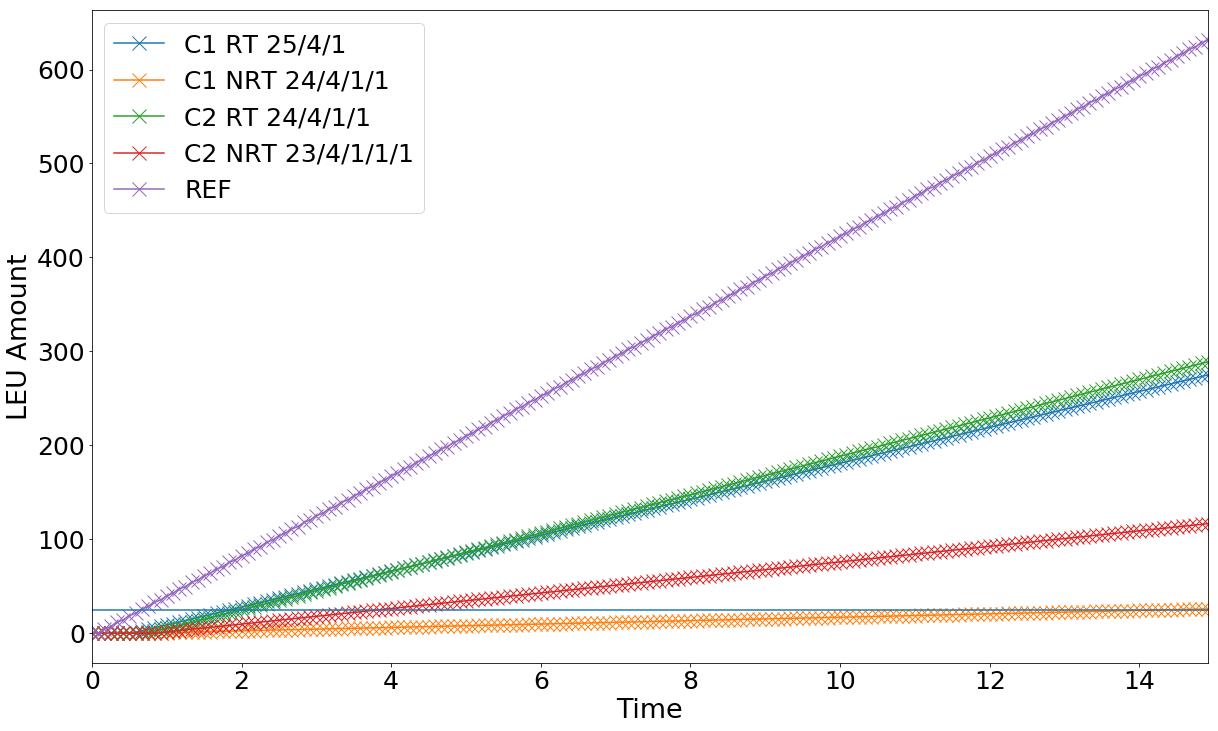

In [12]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/mouginot/work/helpmetric"))
import cymetrichelper as cyh
import pandahelper as pdh


import cymetric as cym
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

files = ['case_2_/cascade_case_2_S2_25_4_1.sqlite',
         'case_2_/cascade_case_2_no_rec_S3_24_4_1_1.sqlite',
         'case_3_/cascade_case_3_S3_24_4_1_1.sqlite',
         'case_3_/cascade_case_3_no_rec_S4_23_4_1_1_1.sqlite',
         'cascade_case_1.sqlite']
invs = ['storage_2',
        'storage_3',
        'storage_3',
        'storage_4',

        'storage']

c_names = ['C1 RT 25/4/1','C1 NRT 24/4/1/1','C2 RT 24/4/1/1','C2 NRT 23/4/1/1/1','REF']

LEU_qty_case_2_x = []
plt_LEU_qty_case_2_x = []

for i in range(5):
    db_ = cym.dbopen(files[i])
    ev_ = cym.Evaluator(db=db_, write=False)

    df_ = tm.inventories(ev_, [invs[i]])
    df_ = pdh.RenameTS(pdh.RemoveNan(df_), "Time", c_names[i])
    df_['Time'] *= 1/12.
    LEU_qty_case_2_x.append(df_)
    plt_LEU_qty_case_2_x.append( (LEU_qty_case_2_x[i], c_names[i]) )
    
pdh.MakePlot(plt_LEU_qty_case_2_x, "Time", "LEU Amount" )
plt.axhline(y=25)

x = np.arange(0, 16, 1);
plt.savefig("HEU_prod.png")